In [13]:
import io
import os
from google.cloud import vision
from google.cloud.vision_v1 import types
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Configurar la autenticación de Google Cloud
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'service_credentials.json'

In [15]:
 # Inicializar el cliente de Vision AI
client = vision.ImageAnnotatorClient()

In [16]:
def analyze_solar_panel(image_path):
     # Cargar la imagen
     with io.open(image_path, 'rb') as image_file:
         content = image_file.read()

     image = types.Image(content=content)

     # Realizar detección de objetos
     objects = client.object_localization(image=image).localized_object_annotations

     # Realizar detección de etiquetas
     labels = client.label_detection(image=image).label_annotations

     # Analizar la imagen
     solar_panels = [obj for obj in objects if obj.name.lower() == 'solar panel']
     efficiency_score = sum([label.score for label in labels if 'efficient' in label.description.lower()])

     return len(solar_panels), efficiency_score

In [17]:
 # Función para visualizar resultados
def plot_results(image_path, num_panels, efficiency):
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Paneles detectados: {num_panels}\nEficiencia estimada: {efficiency:.2f}")
    plt.show()

In [18]:
 # Analizar una imagen de panel solar
image_path = 'perro.jpg'
num_panels, efficiency = analyze_solar_panel(image_path)

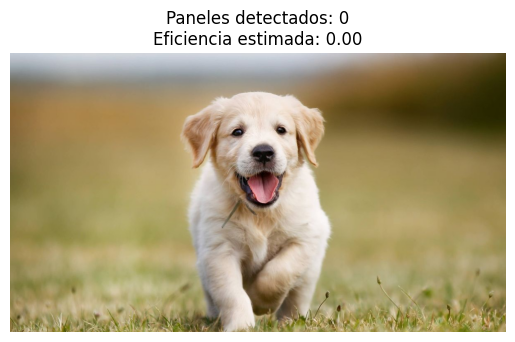

In [19]:
# Visualizar resultados
plot_results(image_path, num_panels, efficiency)

In [20]:
print(f"Número de paneles solares detectados: {num_panels}")
print(f"Puntuación de eficiencia estimada: {efficiency:.2f}")

Número de paneles solares detectados: 0
Puntuación de eficiencia estimada: 0.00


In [21]:
def run_quickstart() -> vision.EntityAnnotation:
    """Provides a quick start example for Cloud Vision."""

    # Instantiates a client
    client = vision.ImageAnnotatorClient()

    # The URI of the image file to annotate
    file_uri = image_path

    image = vision.Image()
    image.source.image_uri = file_uri

    # Performs label detection on the image file
    response = client.label_detection(image=image)
    labels = response.label_annotations

    print("Labels:")
    for label in labels:
        print(label.description)

    return labels

In [22]:
tags = run_quickstart()

Labels:
